# Taller 3 - Gráficos más avanzados

Nombre: Felipe Rojas

Bienvenidos al taller n° 3 del curso Astronomía en la era de la información. En él aplicaremos lo aprendido en talleres anteriores desarrollando gráficos avanzados y estudiando la información en ellos.

Por si quedan dudas, los otros notebooks están disponibles para que vea alguna instrucción, de haberla olvidado.


Acorde a lo visto en clases, hoy trabajaremos con datos de estrellas, tanto reales, como simulados. Pero antes, para introducir el concepto básico de **histograma**, usaremos datos reales del Servicio Médico Legal, en particular, de su registro de atención ciudadana 2012. Este es un archivo que se encuentra disponible abiertamente online, y lo abriremos con el paquete de Python *pandas*, utilizado ya en el taller anterior.



In [1]:
# importamos pandas (de pasada importamos los otros paquetes que usaremos más abajo) y abrimos el archivo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# abrimos el archivo que se encuentra online
data_dir='https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/RegistroEstad%C3%ADsticoDeAtencionesCiudadanas-SML.csv'
tabla_SML=pd.read_csv(data_dir,header=0,sep=',')

In [3]:
# la siguiente línea se incluye porque no todos los valores de edad son números, algunos son "no informa edad"
tabla_SML['Edad']=pd.to_numeric(tabla_SML['Edad'],errors='coerce')

¿Qué es un histograma? Es una de las maneras en las que podemos estudiar cómo una **cantidad está distribuida**. Dicho de otro modo, nos dice cuáles son los valores más y menos comunes de cierta cantidad, y desde ahí nosotros podemos sacar conclusiones. La mayoría de las veces los histogramas se hacen con cantidades numéricas, como va a ser el caso durante nuestros talleres, pero en otras disciplinas se pueden hacer por fecha u algún otro criterio.

Veamos qué columnas tiene nuestra tabla, con un comando tan simple como el siguiente:

In [4]:
tabla_SML.columns

Index([u'Mes', u'Tipo Atención', u'Motivo', u'Sexo', u'Edad',
       u'Comuna del solicitante'],
      dtype='object')

Los nombres de las columnas, como aparece arriba, son 'Mes', 'Edad', etc. ¿Cuáles de esas columnas tienen valor numérico? Claramente la columna n°5, 'Edad'. Podemos darle un vistazo a los datos accediendo a esa columna de la siguiente manera:

In [5]:
tabla_SML['Edad']

0        32.0
1        52.0
2        54.0
3        43.0
4        38.0
5        57.0
6        38.0
7        63.0
8        29.0
9        46.0
10       52.0
11       60.0
12       43.0
13       38.0
14       40.0
15       36.0
16       52.0
17        3.0
18       54.0
19       41.0
20       15.0
21       21.0
22       28.0
23       68.0
24       53.0
25       55.0
26       42.0
27        4.0
28       57.0
29       27.0
         ... 
44266    35.0
44267    43.0
44268    45.0
44269    41.0
44270    47.0
44271    33.0
44272    66.0
44273    14.0
44274    55.0
44275    19.0
44276    40.0
44277    68.0
44278    54.0
44279    51.0
44280    47.0
44281    44.0
44282    32.0
44283    19.0
44284    18.0
44285    22.0
44286    59.0
44287     4.0
44288    58.0
44289    62.0
44290    50.0
44291    42.0
44292    33.0
44293    23.0
44294    65.0
44295    65.0
Name: Edad, dtype: float64

Es muy difícil ver la distribución de las edades así, ¿no? Por lo mismo usaremos el histograma. La construcción del histograma es muy simple: sólo debemos tomar la cantidad que nos interesa graficar, y le agregamos "*.hist*".

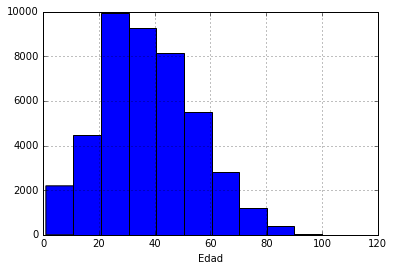

In [6]:
tabla_SML['Edad'].hist()
plt.xlabel('Edad')

Felicitaciones, ¡ha construido su primer histograma! Ahora queda preguntarse cosas como "¿por qué las edades siguen esta distribución?", "¿qué factores pueden cambiar la forma del histograma?", entre otras. 

Un histograma tiene algunas variables que pueden cambiar la construcción de este, y la principal es el número de "bins". Esto se puede cambiar fácilmente como lo vemos abajo:

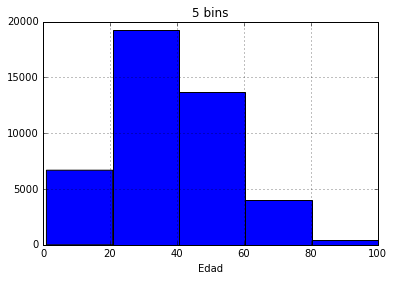

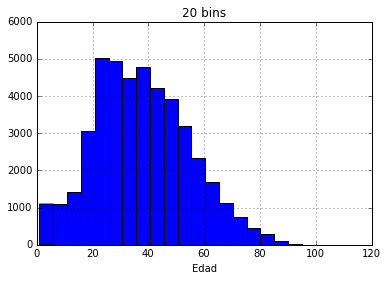

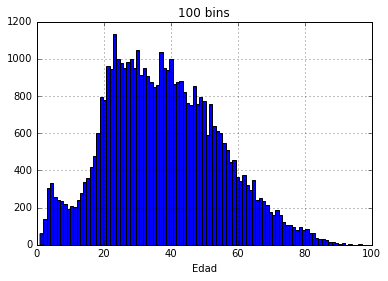

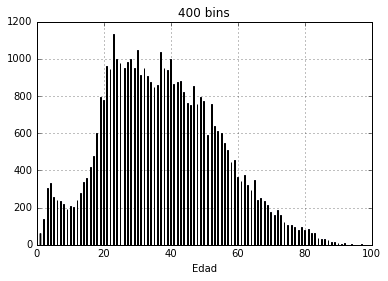

In [7]:
plt.figure(221)
tabla_SML['Edad'].hist(bins=20)
plt.xlabel('Edad')
plt.title('20 bins')
plt.figure(222)
tabla_SML['Edad'].hist(bins=100)
plt.xlabel('Edad')
plt.title('100 bins')
plt.figure(223)
tabla_SML['Edad'].hist(bins=400)
plt.xlabel('Edad')
plt.title('400 bins')
plt.figure(224)
tabla_SML['Edad'].hist(bins=5)
plt.xlabel('Edad')
plt.title('5 bins')
# el valor por defecto es bins=10

¿Cuáles de los histogramas de arriba no tiene sentido realizar, ya sea porque no dan información útil, o porque no agregan nada nuevo?

# Ejercicio 1

Complete el siguiente código que carga una tabla con información de datos reales de estrellas de un cúmulo abierto llamado "Pléyades", muestre las columnas de la tabla, y realice un histograma de la masa (en inglés *Mass*) de las estrellas.

Index([u'recno', u'HII', u'Vmag', u'B-V', u'xpos', u'ypos', u'Dist', u'Mult',
       u'Rem', u'Mass', u'MassA'],
      dtype='object')


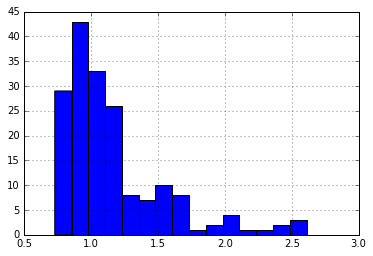

In [8]:
data_dir='https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/pleiades.csv'

#Cargamos el catalogo con pd.read_csv
tabla_pleyades = pd.read_csv(data_dir, header=0, sep=',')

#Mostramos las columnas
print tabla_pleyades.columns

#Hacemos el histograma, con la columna "Mass". Recuerden que es importante diferenciar entre mayusculas y minusculas
plt.figure(221)
tabla_pleyades['Mass'].hist(bins=15)

¿Qué otro tipo de gráficos conocen que no son histogramas?

*pandas* permite realizar gráficos 2-D en un plano cartesiano, de una manera similar a como lo hacíamos antes con *plt.plot()*. Abajo puede ver el ejemplo:

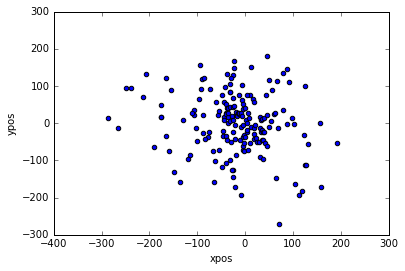

In [9]:
tabla_pleyades.plot.scatter(x='xpos',y='ypos')


Como las Pléyades son un cúmulo, lo que se acaba de graficar es la posición de cada uno de sus miembros observados con respecto al centro del cúmulo. Pero por supuesto esto está lejos de ser lo más interesante que podemos graficar!


Antes de continuar, hablaremos de un concepto fundamental que estudiaremos un poco más en profundidad, que son las correlaciones. Una correlación es, como el nombre lo sugiere, una relación aparente entre dos cantidades (aparente porque no todas las correlaciones tienen una causalidad detrás). Estas relaciones pueden expresarse con una ecuación, como la relación entre el tamaño de la órbita y el periodo orbital de los planetas alrededor del Sol, que vimos en el taller 1 (tercera ley de Kepler). Claramente, el gráfico de arriba no muestra correlación alguna.

Es importante hacer énfasis en lo de que no hay causalidad detrás. Acá hay un ejemplo muy claro:


![Correlación entre el número de piratas y el calentamiento global](http://www.smp.uk.com/sites/default/files/blog_Correlation_Causation_img1.png)

# Ejercicio 2

Realice distintas combinaciones de columnas de la tabla *tabla_pleyades* y grafíquelas usando *tabla_pleyades.plot.scatter()* como fue usado más arriba. Intente encontrar correlaciones entre las distintas cantidades expresadas en las columnas. Recuerde la materia vista en la clase!!

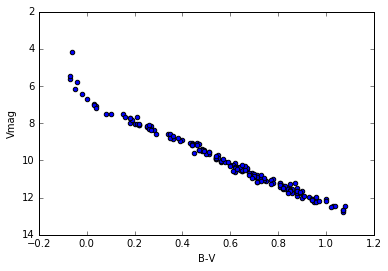

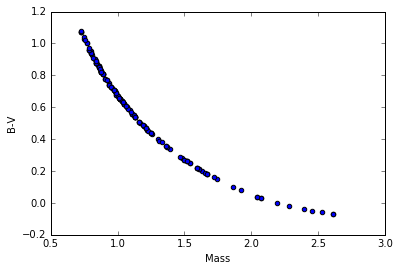

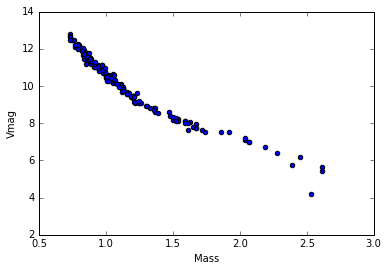

In [10]:
#Uno muy interesante es el color magnitud
#Ojo que el eje de magnitud se invierte
tabla_pleyades.plot.scatter(x='B-V',y='Vmag')
plt.ylim(14,2)

#Masa vs color
tabla_pleyades.plot.scatter(x='Mass',y='B-V')

#Masa vs magnitud
tabla_pleyades.plot.scatter(x='Mass',y='Vmag')

Las correlaciones que usted observa son debido a las leyes físicas que fueron mencionadas en clases. Descubrir las ecuaciones que expresan estas correlaciones quedarán para un taller futuro.

Ahora le agregaremos una dimensión extra a los gráficos: un eje de color. Lo que hacemos es colorear cada punto en el gráfico con un color, y el color está asignado a los valores de otra cantidad:

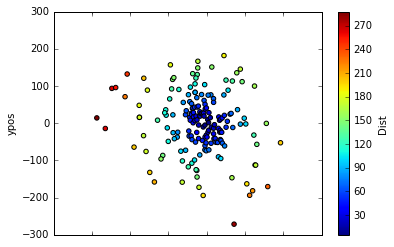

In [11]:
tabla_pleyades.plot.scatter(x='xpos',y='ypos',c='Dist',colormap='jet')

En este caso, se puede ver que la cantidad "*Dist*" aumenta desde la posición (0,0), radialmente hacia afuera. El significado físico detrás de esta correlación entre la posición en el gráfico y el color es muy simple: *Dist* no es más que la distancia de cada estrella al centro del cúmulo. Es por eso que aumenta hacia afuera!

De hecho, lo podemos corroborar: calculamos la distancia utilizando la técnica aprendida en el taller 2 (coordenadas polares) y la comparamos con el valor dado en la tabla calculando la diferencia porcentual (la diferencia dividida por uno de los valores). Para terminar de convencerlos del poder del histograma, también se incluye el histograma de esas diferencias. Nuevamente, es más fácil revisar éste, que ver los 150+ valores uno por uno.

0      5.080947e-05
1     -1.049614e-05
2      1.045741e-05
3     -3.335831e-05
4     -2.289995e-06
5      4.195728e-06
6      3.749603e-06
7      1.436400e-05
8      1.494495e-04
9     -8.548862e-05
10     6.371917e-05
11     1.641394e-04
12     1.382881e-04
13    -2.208765e-05
14    -1.015870e-04
15     8.392472e-06
16     6.341878e-05
17    -5.690614e-06
18     2.247077e-04
19     1.453532e-05
20     1.792370e-04
21     2.034073e-05
22     1.648559e-04
23     1.366673e-06
24     5.019863e-06
25     1.192409e-04
26    -3.943958e-04
27     4.362146e-05
28    -9.141725e-05
29    -1.837840e-04
           ...     
148   -3.822582e-06
149    2.338167e-06
150   -4.909483e-06
151    2.563714e-06
152   -4.188676e-05
153   -2.759092e-05
154    1.666803e-05
155    7.235410e-06
156    1.486512e-06
157   -2.392630e-05
158   -1.151596e-07
159   -6.601502e-05
160   -8.524665e-07
161    5.203908e-06
162    4.009691e-05
163    3.740110e-05
164   -2.079973e-05
165   -1.412621e-05
166    2.735881e-05


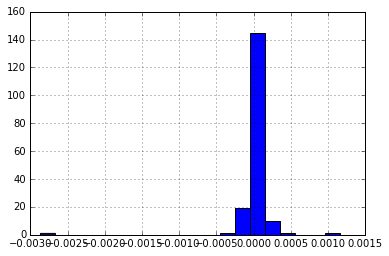

In [12]:
dist=np.sqrt(tabla_pleyades['xpos']**2+tabla_pleyades['ypos']**2)
difpor=(dist-tabla_pleyades['Dist'])/dist
print difpor
difpor.hist(bins=20)

Sin embargo, hay otras correlaciones que son más físicas que pueden hacerse claras en un gráfico con eje de color, que es lo que haremos en el siguiente ejercicio.

# Ejercicio 3
Si todo salió bien en el ejercicio anterior, ud. habrá encontrado (al menos) dos correlaciones, las cuales comparten una cantidad. Con esa cantidad y las dos que correlacionan con ella, construya un gráfico con eje de color que muestre las dos correlaciones.

(14, 2)

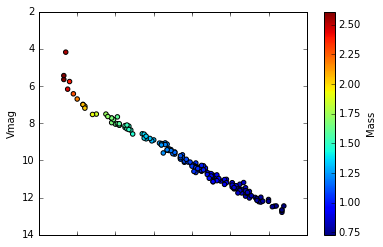

In [13]:
#Construimos el grafico de color vs magnitud y agregamos el eje de color con la masa
tabla_pleyades.plot.scatter(x='B-V',y='Vmag',c='Mass',colormap='jet')
plt.ylim(14,2)

#Condensamos las tres correlaciones en un solo grafico
#Vemos que a menor magnitud (mas brillo) encontramos estrellas mas masivas (ojo, siempre en el contexto del cumulo!)
#A menor color, es decir, estrellas mas azules, tambien tenemos estrellas mas masivas
#Y las estrellas mas brillantes tienen un color mas azul

#Si revisan las clases veran que estas correlaciones hacen sentido